In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
CTAB = 96
GCH = 59
SN = [0, 35]
AA = [0, 35]
GS = 24 

In [3]:
bounds = np.asarray([SN, AA]).T
x = np.linspace(bounds[0,0],bounds[1,0], 4)
y = np.linspace(bounds[0,1],bounds[1,1], 4)
X,Y = np.meshgrid(x,y)
points = np.vstack([X.ravel(), Y.ravel()]).T 
n_samples = points.shape[0]

In [4]:
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
SN = np.round(points[:,0].reshape(-1,1)).astype(int)
AA = np.round(points[:,1].reshape(-1,1)).astype(int)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS))
volume_df = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df

,CTAB,Water,GCH,AA,SN,GS
0,96,121,59,0,0,24
1,96,109,59,0,12,24
2,96,98,59,0,23,24
3,96,86,59,0,35,24
4,96,109,59,12,0,24
5,96,97,59,12,12,24
6,96,86,59,12,23,24
7,96,74,59,12,35,24
8,96,98,59,23,0,24
9,96,86,59,23,12,24


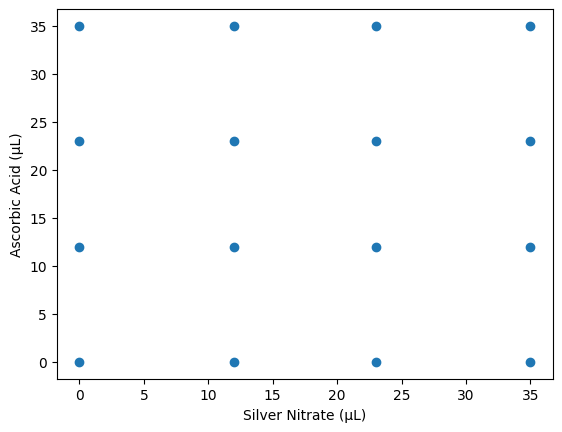

In [5]:
fig, ax = plt.subplots()
ax.scatter(volume_df["SN"], volume_df["AA"])
ax.set_xlabel("Silver Nitrate (µL)")
ax.set_ylabel("Ascorbic Acid (µL)")
plt.show()

In [6]:
volume_df.to_csv('./test_volumes.csv',index=False)